In [16]:
import re
import nltk
import pandas
import jieba
import time
import csv
import numpy as np
import sys
from fintextmin import *
sys.path.insert(0, '../modules/')

data = pandas.read_csv('ptt_posts.csv',encoding='utf-8')
data

,post_class,title,comments
0,季後賽,[情報] 2018 HCT S3 APAC 冬季季後賽 結果,推 dichenfong : SoBayed ㄚㄚㄚ我怎麼最低 01/27 17:47 ...
1,季後賽,Re: [情報] HCT 冬季季後賽 Roger 賽後簡訪,推 sid19881025 : 推! 01/27 17:34 推 bob1012 :...
2,季後賽,[情報] HCT 冬季季後賽 Roger 賽後簡訪,推 MinLu0714 : 我剛好外出hehe 01/27 16:51 推 j3052...
3,季後賽,[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 2,推 key000130 : 頭 01/27 09:52 推 freezesword :...
4,季後賽,Re: [聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1,推 AterPin : ID錯誤？ 01/26 19:16 推 ddong0901...
5,季後賽,[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1,推 kasion : 木停= = 01/26 09:42 → kasion ...
6,季後賽,Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組,推 Jotarun : 週末Muting會上台喔 Pog 01/24 14:01 ...
7,季後賽,[情報] 2018 HCT S3 APAC 冬季季後賽 八強預測,推 lszh9999 : G9 & MingLee 01/24 08:28 推 hb...
8,季後賽,Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組,推 michael7201 : 囧太郎輸了 幫QQ 01/22 21:02 推 hiyor...
9,季後賽,Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組,推 hiyori9977 : 小曹是秘密聖 01/22 20:50 → hiyori99...


In [41]:
doc_names = data['title'].astype(str)
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(data['title'].astype(str), data['comments'].astype(str))}
stopwords = ['吧','啦','imgur','jpg','http','com'] 
dwc = count_words_in_documents(doc_list = data['title'].astype(str)+" "+data['comments'].astype(str),
                              doc_names = data['title'].astype(str),
                              stopwords = stopwords)


In [45]:
from collections import Counter
dwf = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
dwf


{'[情報] 2018 HCT S3 APAC 冬季季後賽 結果': {'[': 1,
  '情報': 1,
  ']': 1,
  ' ': 225,
  'HCT': 1,
  'S3': 1,
  'APAC': 1,
  '冬季': 1,
  '季後賽': 1,
  '結果': 1,
  '推': 21,
  'dichenfong': 1,
  ':': 44,
  'SoBayed': 1,
  'ㄚ': 3,
  '我': 5,
  '怎麼': 2,
  '最低': 1,
  '/': 23,
  'hiyori9977': 1,
  '八強': 1,
  '也': 1,
  '算': 1,
  '走': 1,
  '的': 3,
  '遠': 1,
  '了': 6,
  '=': 4,
  'drowsyPre': 1,
  '蒼汁': 1,
  '是': 3,
  'Aojiru': 1,
  'lens82801': 1,
  '恭喜': 1,
  '阿傑': 4,
  '→': 1,
  'Jotarun': 1,
  '懶得': 1,
  '列牌': 1,
  '組': 1,
  '不': 1,
  '重要': 1,
  'XD': 1,
  'SiaoBen1996': 1,
  '撒旦': 2,
  '：': 2,
  '操': 1,
  'GivePLZ': 1,
  'Max7169': 1,
  '就是': 1,
  '你': 2,
  '沒': 1,
  'po': 1,
  '文': 1,
  '，': 3,
  '不然': 1,
  '四強': 1,
  '就': 1,
  'paul2chiu': 1,
  'Bloodtrail': 4,
  '早': 2,
  '說': 2,
  '一定': 2,
  '行': 2,
  'secret970457': 1,
  'kuonet': 2,
  '我現': 1,
  '在': 1,
  '回去': 1,
  '翻三個': 1,
  '圈': 1,
  '前面': 1,
  '七輪': 1,
  '真的': 1,
  '賽到': 1,
  '不行': 1,
  'chung0817': 1,
  '西瓜': 1,
  '村長': 1,
  '帥氣': 1,
  '反派': 

In [46]:
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1,sort=False)
wfm = np.transpose(wfm).fillna(0)
wfm.index = dwf.keys()


puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

,過,借問,Definition6,香腸,北鼻,瞎,作用,需要,R9,穿到,...,開獎,第一,吃土,這些,hhkkj0000,Max,reexamine,jl60710,假如,村內戰
[情報] 2018 HCT S3 APAC 冬季季後賽 結果,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Re: [情報] HCT 冬季季後賽 Roger 賽後簡訪,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[情報] HCT 冬季季後賽 Roger 賽後簡訪,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 2,0.0,0.0,1.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
Re: [聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[情報] 2018 HCT S3 APAC 冬季季後賽 八強預測,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
[情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Re: [情報] Apxvoid被取消S3季後賽資格,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

,過,借問,Definition6,香腸,北鼻,瞎,作用,需要,R9,穿到,...,開獎,第一,吃土,這些,hhkkj0000,Max,reexamine,jl60710,假如,村內戰
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.087518,0.000000,0.000000,0.000000,0.000000,0.000000,0.061155,...,0.000000,0.035671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.002862,0.020476,0.002561,0.002862,0.002862,0.000000,0.000000,0.000000,...,0.000000,0.025037,0.002862,0.002561,0.000000,0.000000,0.000000,0.000000,0.002862,0.002862
4,0.000000,0.000000,0.000000,0.020087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.008488,0.000000,0.000000,0.006786,0.004244,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.011063,0.000000,0.000000,0.000000,0.000000,0.000000,0.004742,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.039528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.056928,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.031396,0.000000,0.000000,0.012550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017539,0.040922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
features = tfidf_gen.toarray()
labels = data['title'].values
labels

array(['[情報] 2018 HCT S3 APAC 冬季季後賽 結果', 'Re: [情報] HCT 冬季季後賽 Roger 賽後簡訪',
       '[情報] HCT 冬季季後賽 Roger 賽後簡訪', '[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 2',
       'Re: [聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1',
       '[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1',
       'Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組',
       '[情報] 2018 HCT S3 APAC 冬季季後賽 八強預測',
       'Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組',
       'Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組',
       'Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組',
       '[情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組', 'Re: [情報] Apxvoid被取消S3季後賽資格',
       '[情報] bloodyface的冬季季後賽賽晉級之旅', 'Re: [情報] Apxvoid被取消S3季後賽資格',
       '[情報] Apxvoid被取消S3季後賽資格', '[情報] 2018 HCT S3 APAC 冬季季後賽 選手簡介',
       'Re: [聯賽] 2018 HCT S3 AM 冬季季後賽 Day 2',
       '[情報] 2018 HCT S3 AM 冬季季後賽 結果', '[實況] g9malygos 一起看夏季賽牌組 晚上播比賽',
       'Re: [閒聊] NA 2018HCT夏季賽帶牌', 'Re: [閒聊] NA 2018HCT夏季賽帶牌',
       '[閒聊] NA 2018HCT夏季賽帶牌', '[聯賽] 2017 黃金超級聯賽夏季賽決賽日',
       '[新聞] 台灣電競好手陳威霖 夏季賽晉級8強[影]', '[情報] 專訪 Tom60229：對這次夏季賽有信心',
       '[閒聊] 鍋貼專欄

In [53]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
data['pca1'] = pandas.DataFrame(transData[:,0])
data['pca2'] = pandas.DataFrame(transData[:,1])
data.head()

,post_class,title,comments,pca1,pca2
0,季後賽,[情報] 2018 HCT S3 APAC 冬季季後賽 結果,推 dichenfong : SoBayed ㄚㄚㄚ我怎麼最低 01/27 17:47 ...,-0.192916,-0.182082
1,季後賽,Re: [情報] HCT 冬季季後賽 Roger 賽後簡訪,推 sid19881025 : 推! 01/27 17:34 推 bob1012 :...,-0.198980,-0.143876
2,季後賽,[情報] HCT 冬季季後賽 Roger 賽後簡訪,推 MinLu0714 : 我剛好外出hehe 01/27 16:51 推 j3052...,-0.169263,-0.300434
3,季後賽,[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 2,推 key000130 : 頭 01/27 09:52 推 freezesword :...,-0.387008,-0.050828
4,季後賽,Re: [聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1,推 AterPin : ID錯誤？ 01/26 19:16 推 ddong0901...,-0.292236,0.000149


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


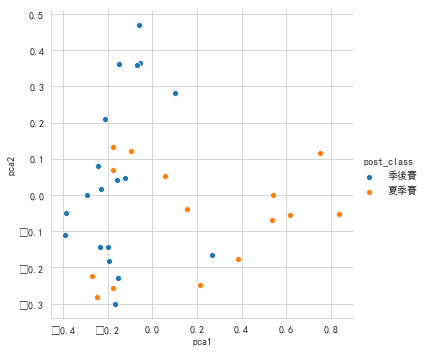

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.pairplot(x_vars=['pca1'], y_vars=['pca2'],data=data, hue="post_class", size=5)

In [59]:
textFrame = pandas.DataFrame(features, columns=list(set(wfm)))
textFrame.head()
len(features)

34

In [60]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [62]:
allF[np.nonzero(allF)]

array([0.07996418, 0.06561305, 0.15158714, ..., 0.15806578, 0.27038975,
       0.09718546])

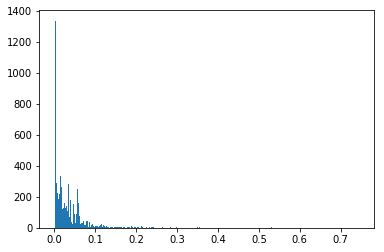

0.01753938392121657

In [63]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [64]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [65]:
for i in range(len(features)):
    print(dataset[i])

['wesg', '制', 'mode', '我家', '打頭', '表示', 'fff88016', '表演', 'Nuey', '開燒', 'weichilin', 'starlight102', 'qwe3612306']
['大大', 'T2', '組還', '這樣子', '冰法', '你好', 'wtfskysa', '丟比賽', '看', '內戰', '想過', 'qwe3612306']
['wesg', '上位', 'ME', '出過', '固執', '認為', 'Taiwan', 'tw', '三區', '總管', 'EXZARDLE', '九桃郎', 'qwe3612306']
['the', '點跟', '瑞之盧', 'chemikelvin', '表示', '表演', 'qwe3612306']
['點跟', '瑞之盧', '最多輸', '表示', '而且', '場面', '圈長', '各斷', '副', 'qwe3612306', '清掉', '寶貝']
['平常', '點跟', '瑞之盧', '表示', '表演', '還敢', 'weichilin', 'qwe3612306']
['太郎', '知道', '冰法', '點跟', '猛', '瑞之盧', '金賽', '變圖片', 'ok8752665', 'qwe3612306']
['老面孔', 'soo', '台北人', '鼠配', '東想西', 'saltinptt', '統計裡', 'missingkid', '挖', '瑞之盧', 'pan46', '有後續', '牧想', '吃', '算錯', '合獵', '林', 'qwe3612306']
['wesg', 'killinallday', '知道', 'the', '點跟', '瑞之盧', '表示', '爆炸', 'aa1212321', '表演', '個噴', 'qwe3612306']
['連長', '一臉', 'kikujiro', 'WESG', 'some', '按', '終於抱', '阿傑用', '一開', '封', 'qoo60606', '點跟', '開出', '瑞之盧', '一手', '新聞', '讀', 'WV6IEp9', '懷念', '他贏', '打太爛', '該拿個', 'qwe3612306']


In [69]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = list(df.index)

In [70]:
graph.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
_,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
a,True,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
c,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
result = apriori(graph, min_support=minsup)
result

,support,itemsets
0,0.571429,(0)
1,0.285714,(1)
2,0.500000,(2)
3,0.285714,(3)
4,0.285714,(4)
5,0.142857,"(0, 1)"
6,0.285714,"(0, 2)"
7,0.214286,"(0, 3)"
8,0.214286,"(0, 4)"
9,0.142857,"(1, 2)"


In [72]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, metric="confidence", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(2, 3)",(0),0.071429,0.571429,0.071429,1.0,1.75,0.030612,inf
1,"(2, 4)",(0),0.071429,0.571429,0.071429,1.0,1.75,0.030612,inf
2,"(0, 3)",(4),0.214286,0.285714,0.214286,1.0,3.50,0.153061,inf
3,"(0, 4)",(3),0.214286,0.285714,0.214286,1.0,3.50,0.153061,inf
4,"(3, 4)",(0),0.214286,0.571429,0.214286,1.0,1.75,0.091837,inf


In [73]:
rules = association_rules(result, metric="lift", min_threshold=4)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(0, 3)","(2, 4)",0.214286,0.071429,0.071429,0.333333,4.666667,0.056122,1.392857
1,"(0, 4)","(2, 3)",0.214286,0.071429,0.071429,0.333333,4.666667,0.056122,1.392857
2,"(2, 3)","(0, 4)",0.071429,0.214286,0.071429,1.000000,4.666667,0.056122,inf
3,"(2, 4)","(0, 3)",0.071429,0.214286,0.071429,1.000000,4.666667,0.056122,inf


In [74]:

rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"(0, 3)","(2, 4)",0.214286,0.071429,0.071429,0.333333,4.666667,0.056122,1.392857,2
1,"(0, 4)","(2, 3)",0.214286,0.071429,0.071429,0.333333,4.666667,0.056122,1.392857,2
2,"(2, 3)","(0, 4)",0.071429,0.214286,0.071429,1.000000,4.666667,0.056122,inf,2
3,"(2, 4)","(0, 3)",0.071429,0.214286,0.071429,1.000000,4.666667,0.056122,inf,2


In [75]:
out = rules[ (rules['antecedant_len'] >= 1) &
       (rules['confidence'] > 0) &
       (rules['lift'] > 1) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"(0, 3)","(2, 4)",0.214286,0.071429,0.071429,0.333333,4.666667,0.056122,1.392857,2
1,"(0, 4)","(2, 3)",0.214286,0.071429,0.071429,0.333333,4.666667,0.056122,1.392857,2
2,"(2, 3)","(0, 4)",0.071429,0.214286,0.071429,1.000000,4.666667,0.056122,inf,2
3,"(2, 4)","(0, 3)",0.071429,0.214286,0.071429,1.000000,4.666667,0.056122,inf,2


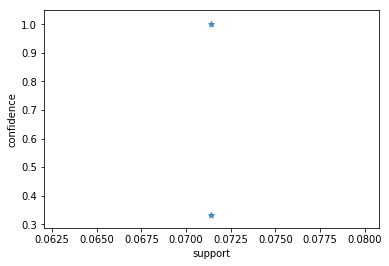

In [76]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [77]:

len(rules)
rules['antecedents'].head()

0    (0, 3)
1    (0, 4)
2    (2, 3)
3    (2, 4)
Name: antecedents, dtype: object

In [78]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(df)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

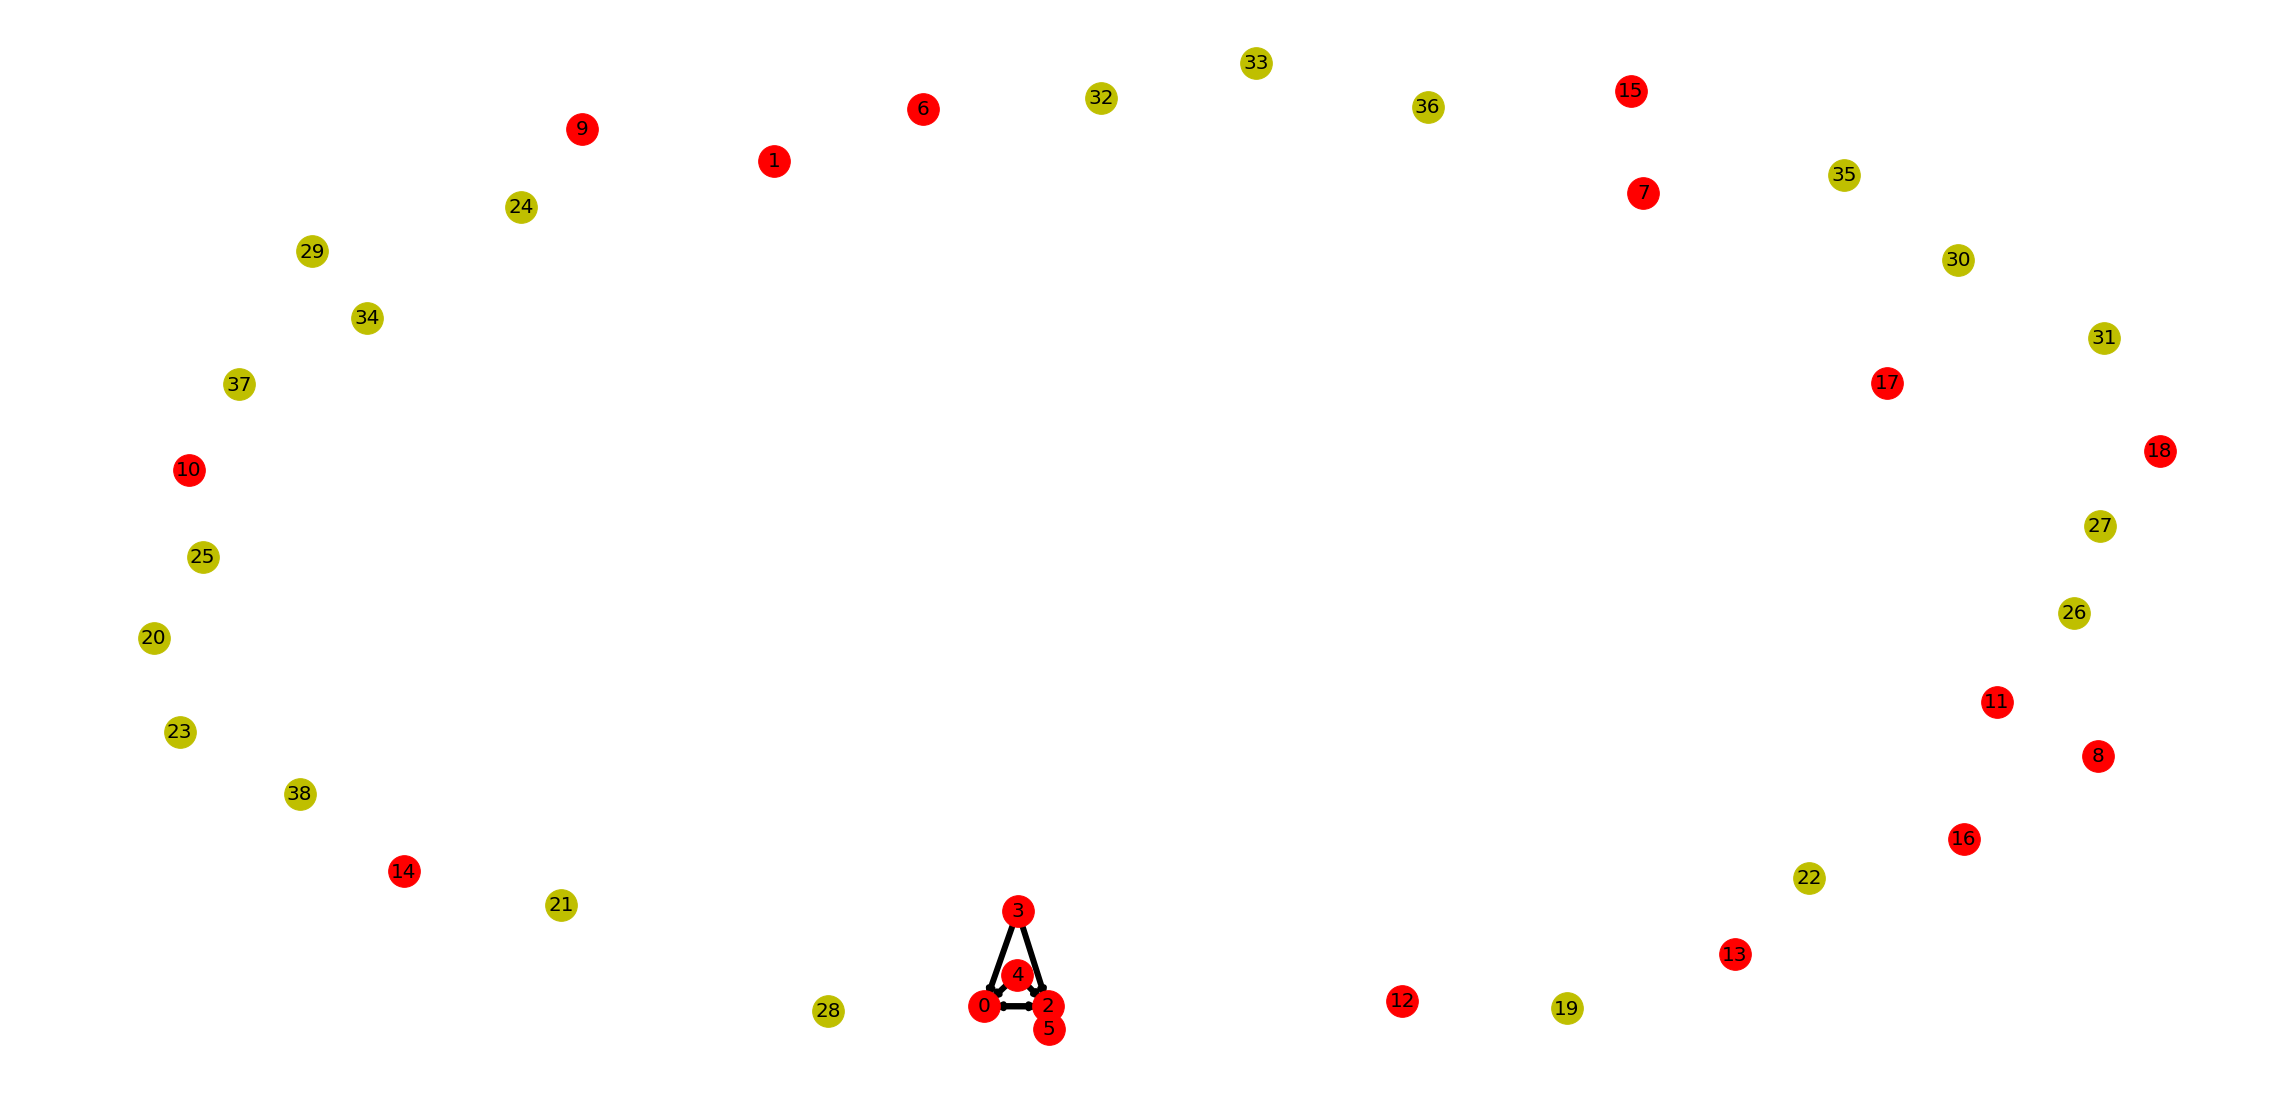

In [81]:
nodeListA = df.index[data['post_class'] == '夏季賽'].tolist()
nodeListB = df.index[data['post_class'] == '季後賽'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="y", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [80]:
print(list(nx.isolates(G)))

[1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [82]:
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(0, 2)}

In [83]:
pandas.DataFrame(data['title'])

,title
0,[情報] 2018 HCT S3 APAC 冬季季後賽 結果
1,Re: [情報] HCT 冬季季後賽 Roger 賽後簡訪
2,[情報] HCT 冬季季後賽 Roger 賽後簡訪
3,[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 2
4,Re: [聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1
5,[聯賽] 2018 HCT S3 APAC 冬季季後賽 Day 1
6,Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組
7,[情報] 2018 HCT S3 APAC 冬季季後賽 八強預測
8,Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組
9,Re: [情報] 2018 HCT S3 APAC 冬季季後賽 選手牌組
